True
-----
dict length: 176
-----
   Year Month  Average_nSearches
0  2004    01                 92
1  2004    02                 93
2  2004    03                 83
3  2004    04                 77
4  2004    05                 78


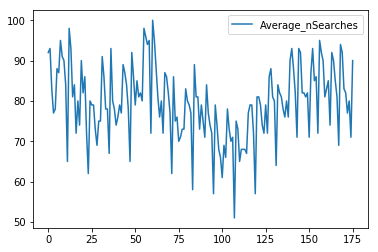

In [44]:
import requests
import pandas as pd
import json
from datetime import datetime
import matplotlib

# Search for 'job' 2004-
url = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222004-01-01+2018-08-26%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22job%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4QYUBiTZJun1Tk9Ech73slURKjPDR2E&tz=-120'

# Search for 'job' last 12 months
#url = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222017-08-26+2018-08-26%22,%22resolution%22:%22WEEK%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22job%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4QYrGUU6pWSo1zs0zJvLwLnU9iRellO&tz=-120'

response = requests.get(url)
print(response.ok)
print('-----')
dict = json.loads(response.text.split(")]}\',\n")[1])
#print(dict)

# saving length of the timelineData dict
dict_length = len(dict['default']['timelineData'])
print('dict length: ' + str(dict_length)); print('-----')

timelinedata_list = [] 

for i in range(0,dict_length):
    # Extracting value (keyword: 'time')
    time = dict['default']['timelineData'][i]['time']
    
    year = datetime.utcfromtimestamp(int(time)).strftime('%Y')
    month = datetime.utcfromtimestamp(int(time)).strftime('%m')

    # Extracting value (keyword: 'value'). Pulling out first element, since list with one element.
    value = dict['default']['timelineData'][i]['value'][0]
    
    
    help_list =[]
    help_list.append(year)
    help_list.append(month)
    help_list.append(value)
    timelinedata_list.append(help_list)
    
#print(timelinedata_list)

df = pd.DataFrame(timelinedata_list)
df.columns = ['Year', 'Month' , 'Average_nSearches']
#print(df)

df2 = df.groupby(['Year', 'Month'], as_index=False).mean()
print(df2.head())
df2.plot()
#out = time.strftime("%a, %d %b %Y %H:%M:%S %Z", time.localtime(test))
#print(dict['default']['timelineData'][1]['time'])
#print(dict['default']['timelineData'][1]['value'])#.keys())

#print(datetime.utcfromtimestamp(test).strftime('%m'))





In [42]:
# Read unemployment data from csv
csv = pd.read_excel('/Users/karlbindslev/Documents/GitHub/sds_group29/Bruttoledige3.xlsx')
print(csv.head(5))
csv['Month'] =  [x[5:] for x in csv['Date']]
csv['Year'] =  [x[0:4] for x in csv['Date']]
print(csv.head(5))



      Date  Bruttoledige
0  2007M01           4.3
1  2007M02           4.1
2  2007M03           3.9
3  2007M04           3.9
4  2007M05           3.8
      Date  Bruttoledige Month  Year
0  2007M01           4.3    01  2007
1  2007M02           4.1    02  2007
2  2007M03           3.9    03  2007
3  2007M04           3.9    04  2007
4  2007M05           3.8    05  2007


In [ ]:
# Requires the pytrends library. To install, run "pip install pytrends".
from pytrends.pyGTrends import pyGTrends
import time
import os
from random import randint
import pandas as pd
 
# Add your Gmail username to the google_username variable and your Gmail password to the google_password variable.
google_username = "karlbindslev@gmail.com"
google_password = "Qcb48sgn"
connector = pyGTrends(google_username, google_password)
 
# This script downloads a series of CSV files from Google Trends. Please specify a filepath for where you'd like these files to be stored in the below variable.
path = ""
 
# Specify the filename of a CSV with a list of keywords in the variable, keyordcsv. The CSV should be one column, with header equal to Keywords (case sensitive).
keywordcsv = "keywords.csv"
keywords = pd.read_csv(keywordcsv)
 
# Downloads and Calculate Slope:
keywordlist = pd.DataFrame(columns=["keyword","slope"])
for index, row in keywords.iterrows():
    print("Downloading Keyword #" + str(index))
    payload = {'geo': 'US', 'q': [row[0]]}
    connector.request_report(payload)
    time.sleep(randint(5, 10))
    connector.save_csv(path, str(index))
    csvname = str(index)+".csv"
    trenddata = pd.read_csv(csvname, skiprows=4, names=['date', 'values'])
    keyword = trenddata['values'].loc[[0]][0]
    trenddata = trenddata.ix[1:]
    trenddata['keyword'] = keyword
    trenddata.rename(columns={'values': 'trends'}, inplace=True)
    trenddata['trends'] = pd.to_numeric(trenddata['trends'], errors='coerce')
    trenddata['date'] = trenddata['date'].str.extract('(^[0-9]{4}\-[0-9]{2}\-[0-9]{2}) \-.*')
    trenddata = trenddata.dropna()
    trenddata['date'] = pd.to_datetime(trenddata['date'])
    trenddata['year'] = pd.DatetimeIndex(trenddata['date']).year
    trenddata['month'] = pd.DatetimeIndex(trenddata['date']).month
    trenddata['day'] = pd.DatetimeIndex(trenddata['date']).day
 
    maxyear = trenddata['year'].max()
    grouped = trenddata.groupby(['year']).mean()
 
    def slope_formula(xone, yone, xtwo, ytwo):
        return (ytwo-yone)/(xtwo-xone)
 
    maxyear = trenddata['year'].max()
    grouped = trenddata.groupby(['year']).mean()
    slope = slope_formula(1,float(grouped.loc[grouped.index==maxyear-2]['trends']),
                          2,float(grouped.loc[grouped.index==maxyear-1]['trends']))
    keywordlist = keywordlist.append({'keyword':keyword,'slope':slope}, ignore_index=True)
    os.remove(csvname)
 
# Specify a csv filename to output the slope values.
keywordlist.to_csv("trends_slope.csv", sep=",", encoding="utf-8", index=False)
 
print("Slope calculation and CSV export complete.")